<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [2]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [3]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [4]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [5]:
npR
np.allclose(np.triu(npR), npR) or np.allclose(np.tril(npR), npR)

True

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    #initialize Q and R
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        v = A[:, j]  # Start with the original vector
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])  # Calculate the projection coefficient
            v = v - R[i, j] * Q[:, i]  # Subtract the projection from v
        R[j, j] = np.linalg.norm(v)  # Compute the norm of the modified vector
        Q[:, j] = v / R[j, j]  # Normalize the modified vector and store it in Q
    ##Your Code ends here
    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [10]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    #initialize Q and R
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], V[:,j])  # Calculate the projection coefficient
            V[:,j] = V[:,j] - R[i, j] * Q[:, i]  # Subtract the projection from v
        
        R[j, j] = np.linalg.norm(V[:,j])  # Compute the norm of the modified vector
        Q[:, j] = V[:,j] / R[j, j]  # Normalize the modified vector and store it in Q

    ##Your Code ends here
    return Q, R

In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [15]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

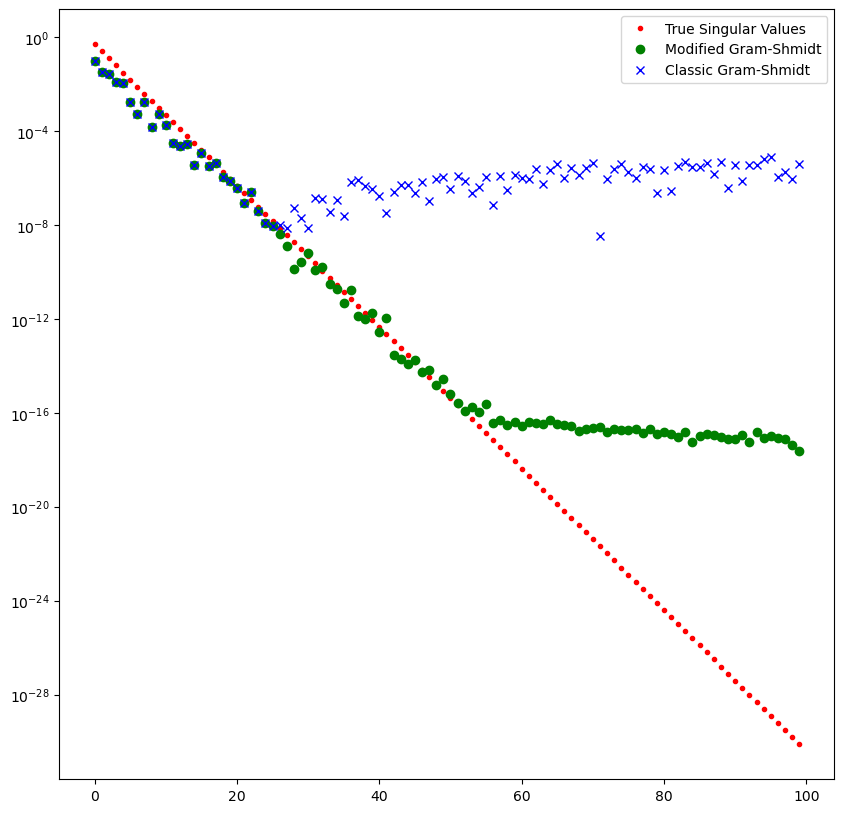

In [16]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [17]:
##Your Code start here
def qr_algorithm(A, iterations):
    n = A.shape[0]
    Ak = A
    for k in range(iterations):
        Q, R = np.linalg.qr(Ak)  # QR decomposition
        Ak = np.dot(R, Q)  # Update Ak to the next iteration

        if k + 1 in [1, 5, 10, 20, 100]:  # Print eigenvalues at specified iterations
            eigenvalues = np.diag(Ak)
            print(f"Iteration {k+1}: Eigenvalues = {eigenvalues}")

    return np.diag(Ak)  # Return the diagonal of Ak as the eigenvalues

##Your Code ends here

In [18]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
iterations = 100
eigenvalues = qr_algorithm(A, iterations)
print("\nFinal Eigenvalues:")
print(eigenvalues)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
Iteration 1: Eigenvalues = [2. 2. 0. 3.]
Iteration 5: Eigenvalues = [ 2.7929  1.4541 -0.247   3.    ]
Iteration 10: Eigenvalues = [ 2.8019  1.4451 -0.247   3.    ]
Iteration 20: Eigenvalues = [ 2.8019  1.445  -0.247   3.    ]
Iteration 100: Eigenvalues = [ 2.8019  1.445  -0.247   3.    ]

Final Eigenvalues:
[ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

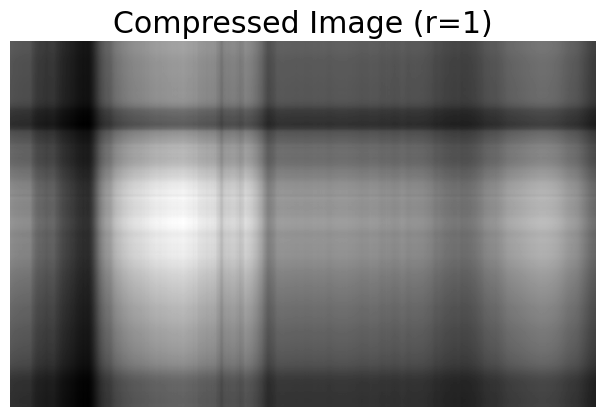

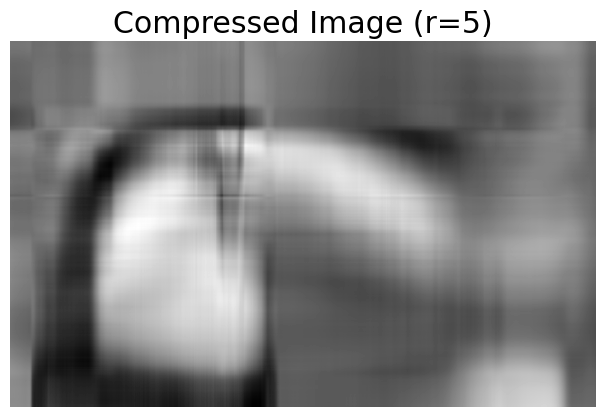

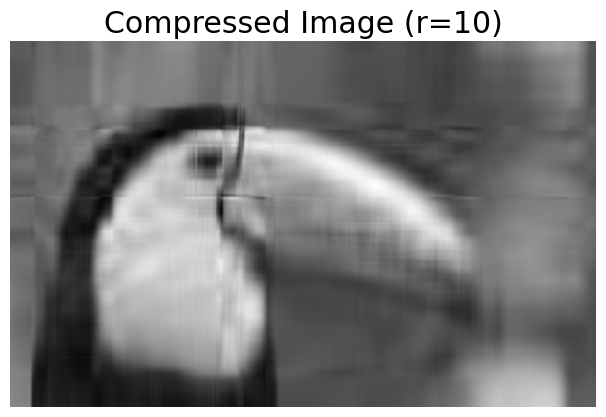

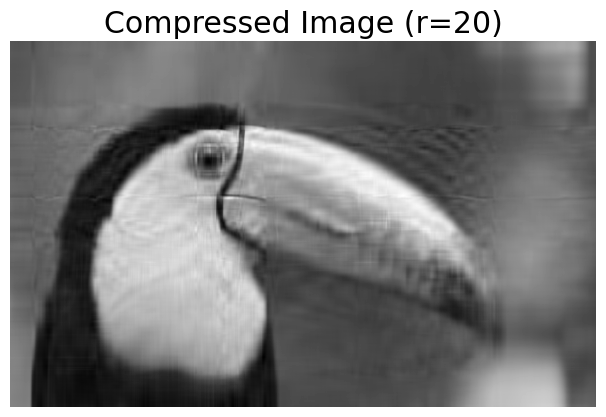

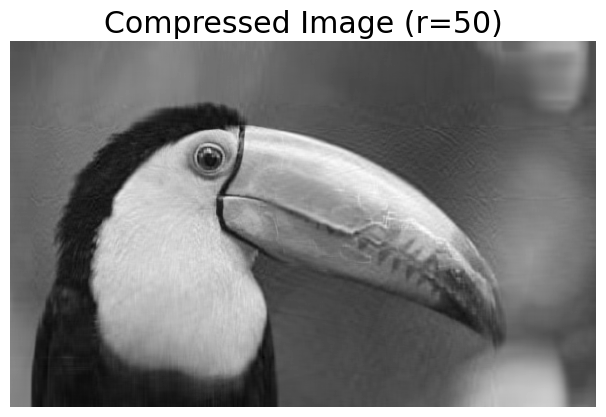

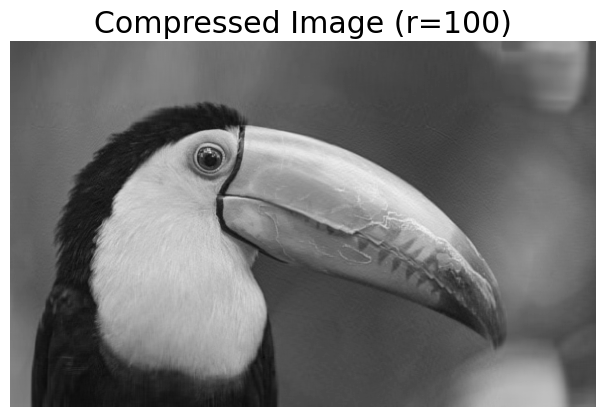

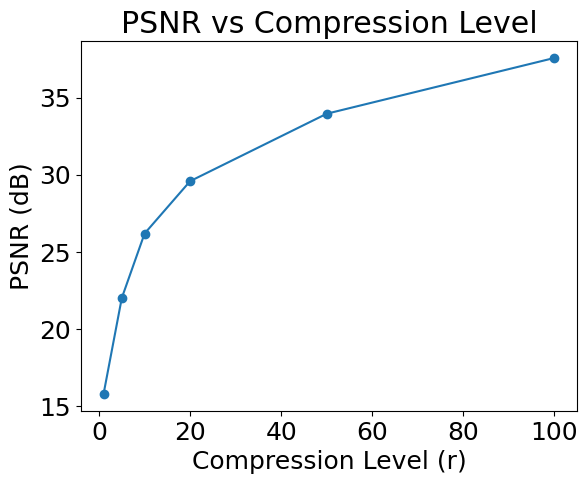

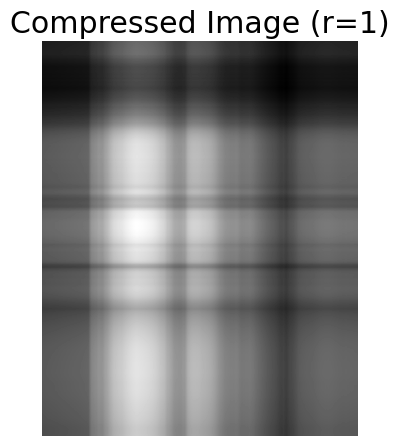

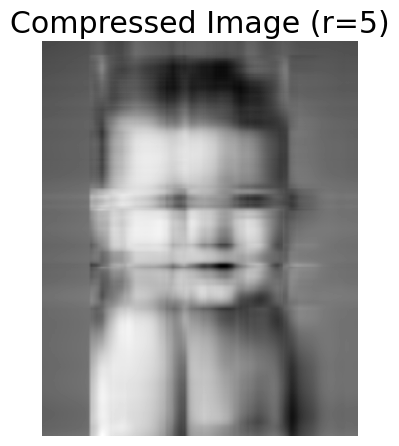

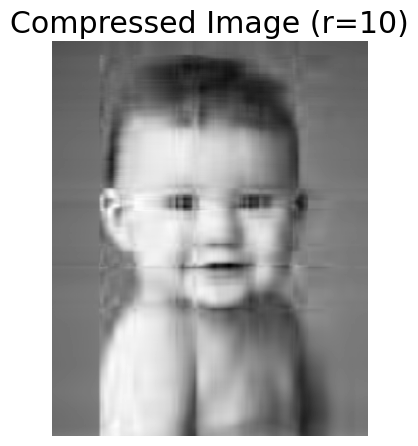

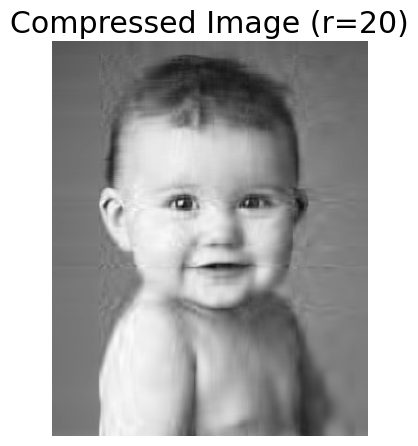

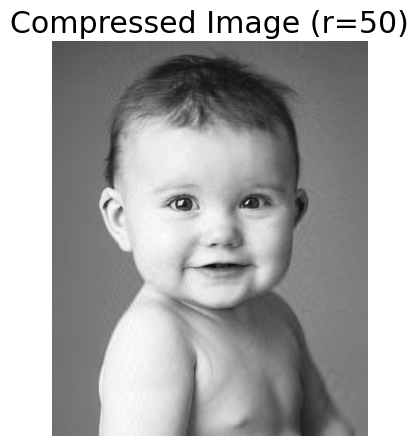

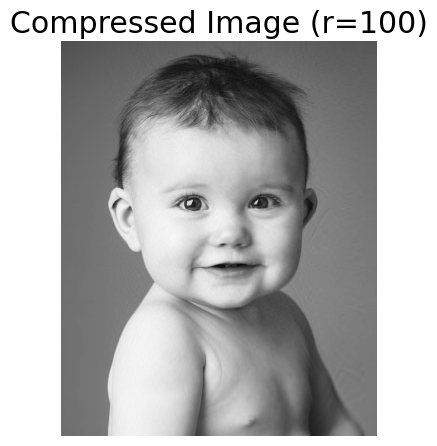

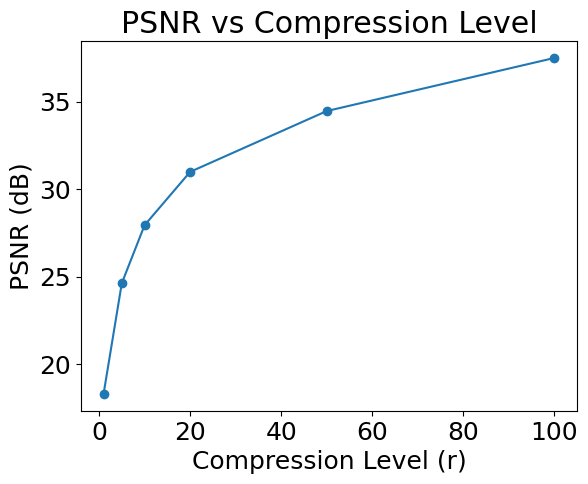

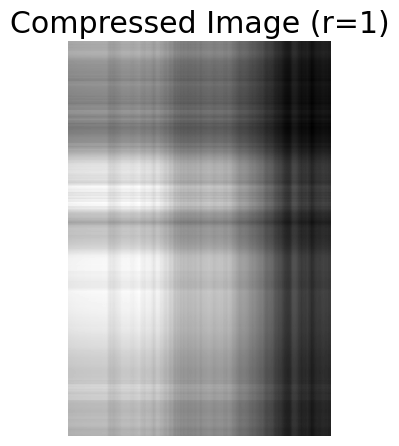

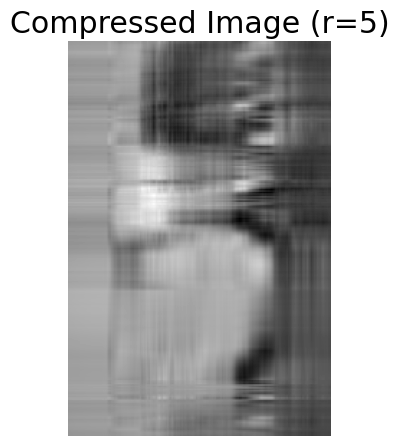

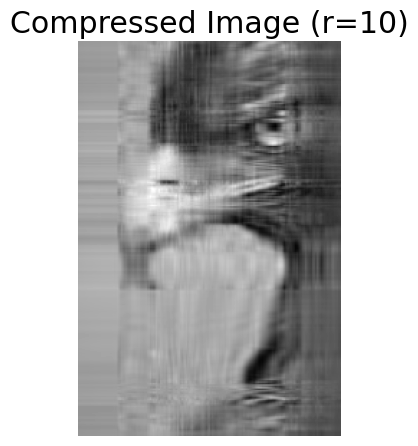

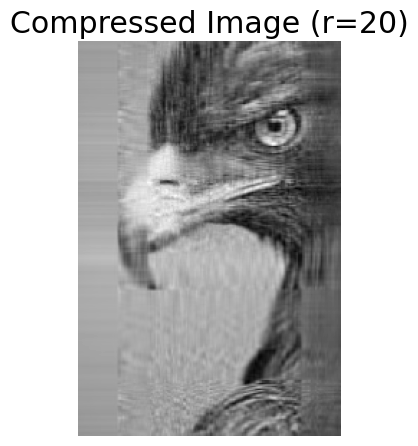

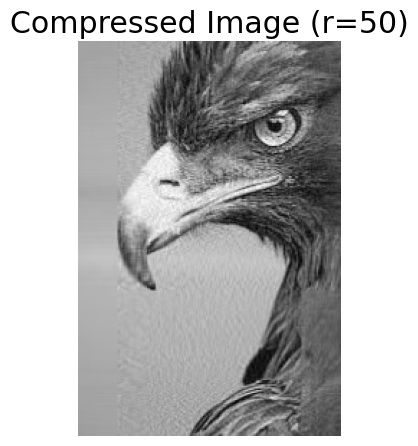

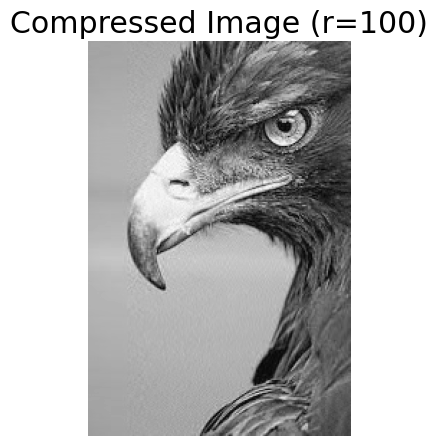

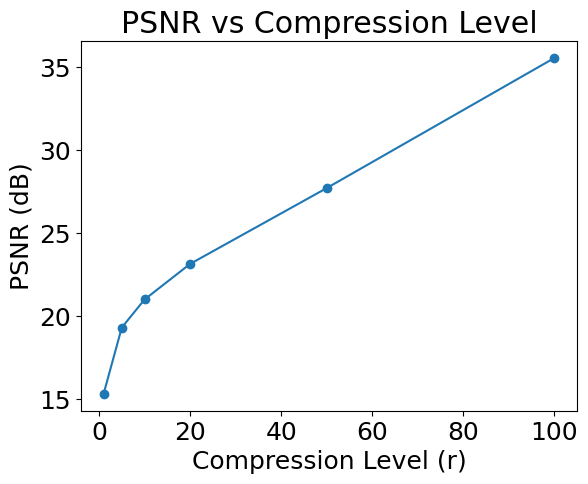

In [19]:
##Your Code start here
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform image compression using SVD
def compress_image(image, r):
    img = Image.open(image).convert('L')  # Open input image in grayscale mode
    A = np.array(img)
    U, s, Vt = np.linalg.svd(A, full_matrices=False)  # Perform SVD
    reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(s[:r]), Vt[:r, :]))  # Reconstruct image with reduced rank
    return reconstructed_image

# Function to calculate PSNR between two images
def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Test inputs : pic.jpg
original_image = np.array(Image.open('pic.jpg').convert('L'))
compression_levels = [1, 5, 10, 20, 50, 100]  # Different r values for compression

psnr_values = []
for r in compression_levels:
    compressed_image = compress_image('pic.jpg', r)
    psnr = calculate_psnr(original_image, compressed_image)
    psnr_values.append(psnr)
    

    plt.imshow(compressed_image , cmap='gray')
    plt.title(f'Compressed Image (r={r})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
# Plot PSNR diagram
plt.plot(compression_levels, psnr_values, marker='o')
plt.xlabel('Compression Level (r)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Compression Level')
plt.show()


# Test inputs : my_pic1.jpg
original_image = np.array(Image.open('my_pic1.jpg').convert('L'))
compression_levels = [1, 5, 10, 20, 50, 100]  # Different r values for compression

psnr_values = []
for r in compression_levels:
    compressed_image = compress_image('my_pic1.jpg', r)
    psnr = calculate_psnr(original_image, compressed_image)
    psnr_values.append(psnr)
    

    plt.imshow(compressed_image , cmap='gray')
    plt.title(f'Compressed Image (r={r})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
# Plot PSNR diagram
plt.plot(compression_levels, psnr_values, marker='o')
plt.xlabel('Compression Level (r)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Compression Level')
plt.show()



# Test inputs : my_pic2.jpg
original_image = np.array(Image.open('my_pic2.jpg').convert('L'))
compression_levels = [1, 5, 10, 20, 50, 100]  # Different r values for compression

psnr_values = []
for r in compression_levels:
    compressed_image = compress_image('my_pic2.jpg', r)
    psnr = calculate_psnr(original_image, compressed_image)
    psnr_values.append(psnr)
    

    plt.imshow(compressed_image , cmap='gray')
    plt.title(f'Compressed Image (r={r})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
# Plot PSNR diagram
plt.plot(compression_levels, psnr_values, marker='o')
plt.xlabel('Compression Level (r)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Compression Level')
plt.show()




##Your Code ends here

### Answer

As we can see form the output images and the diagram, by increasing r, we can get better output and also we have increase in amount of PSNR.

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


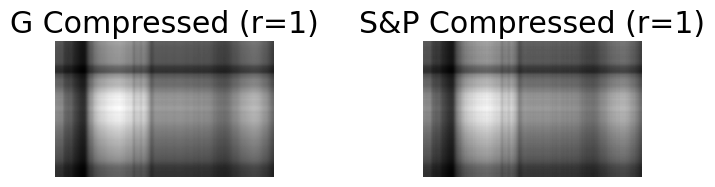

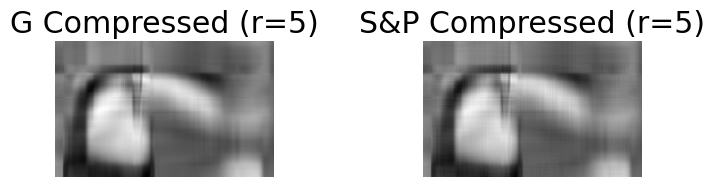

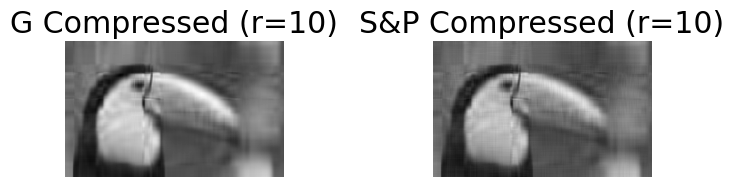

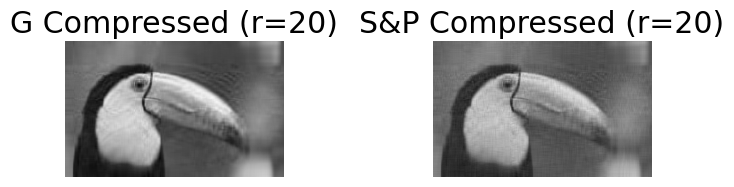

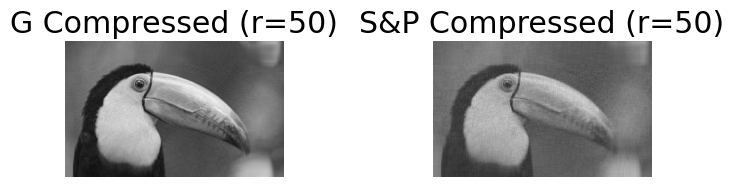

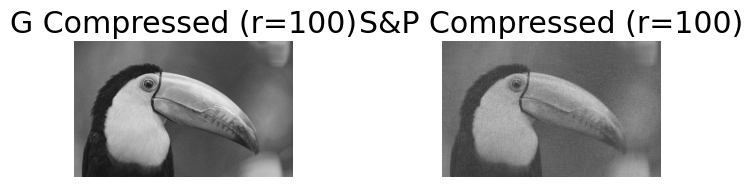

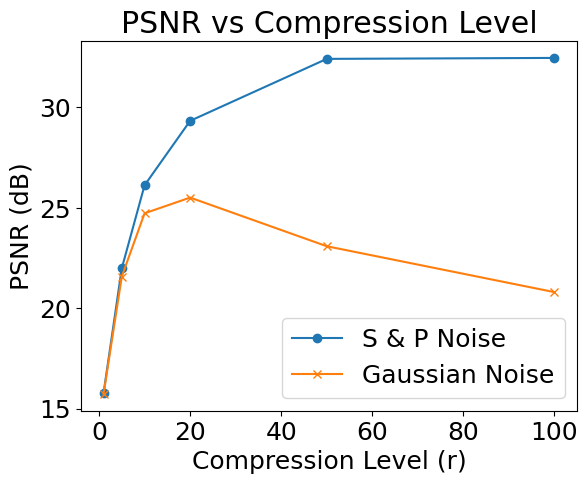

In [20]:
##Your Code start here

import numpy as np
import cv2
from PIL import Image


def add_salt_and_pepper_noise(image, salt_vs_pepper, amount):
    A = np.array(image)
    out = np.copy(A)
    num_salt = np.ceil(amount * A.size * salt_vs_pepper)
    salt_coords = [np.random.randint(0, i, int(num_salt)) for i in A.shape]  # Remove -1 from the upper bound
    salt_coords = [np.clip(coord, 0, size - 1) for coord, size in zip(salt_coords, A.shape)]  # Clip coordinates to valid range
    out[tuple(salt_coords)] = 255  # Use tuple indexing to access the coordinates

    num_pepper = np.ceil(amount * A.size * (1.0 - salt_vs_pepper))
    pepper_coords = [np.random.randint(0, i, int(num_pepper)) for i in A.shape]  # Remove -1 from the upper bound
    pepper_coords = [np.clip(coord, 0, size - 1) for coord, size in zip(pepper_coords, A.shape)]  # Clip coordinates to valid range
    out[tuple(pepper_coords)] = 0  # Use tuple indexing to access the coordinates

    return out

def add_gaussian_noise(image, mean, sigma):
    A = np.array(image)
    row, col = A.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = A + gauss
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)

def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def compress_image(image, r):
    A = np.array(image)
    U, s, Vt = np.linalg.svd(A, full_matrices=False)  # Perform SVD
    reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(s[:r]), Vt[:r, :]))  # Reconstruct image with reduced rank
    return reconstructed_image

# Test inputs : pic.jpg
original_image = np.array(Image.open('pic.jpg').convert('L'))

# Add salt and pepper noise to the image
salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, 0.3 , 0.1)

# Add Gaussian noise to the image
gaussian_noisy_image = add_gaussian_noise(original_image, 0, 10)

compression_levels = [1, 5, 10, 20, 50, 100]  # Different r values for compression

gauss_psnr_values = []
sANDp_psnr_values = []
for r in compression_levels:
    gauss_compressed_image = compress_image(gaussian_noisy_image, r)
    sANDp_compressed_image = compress_image(salt_pepper_noisy_image , r)
    gauss_psnr = calculate_psnr(original_image, gauss_compressed_image)
    gauss_psnr_values.append(gauss_psnr)
    sANDp_psnr = calculate_psnr(original_image, sANDp_compressed_image)
    sANDp_psnr_values.append(sANDp_psnr)
    
    plt.subplot(1,5,(1,2))
    plt.imshow(gauss_compressed_image , cmap='gray')
    plt.title(f'G Compressed (r={r})')
    plt.axis('off')

    plt.subplot(1,5,(4,5))
    plt.imshow(sANDp_compressed_image , cmap='gray')
    plt.title(f'S&P Compressed (r={r})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
# Plot PSNR diagram
plt.plot(compression_levels, gauss_psnr_values, marker='o',label='S & P Noise')
plt.plot(compression_levels, sANDp_psnr_values, marker='x',label='Gaussian Noise')
plt.xlabel('Compression Level (r)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Compression Level')
plt.legend()
plt.show()

##Your Code ends here

### Answer:
As shown in the figure, we can have a better compression output for gaussian noise.
If we have gaussian noise, by increasing r, PSNR increases too. But for salt and pepper noise, PSNR increases with increasing r for r<20. but if r>20, PSNR decrease by increasing r.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Import Dataset

In [2]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

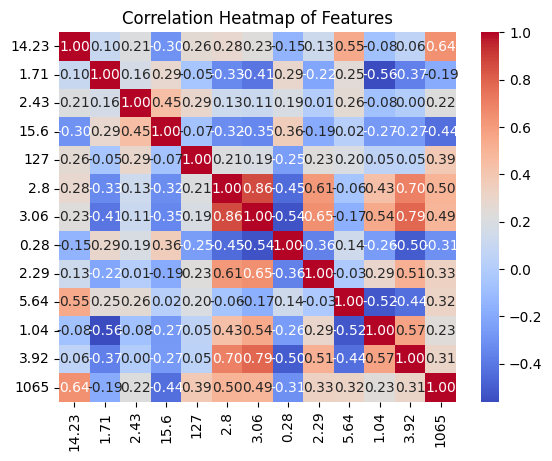

NameError: name 'X' is not defined

In [3]:
##Your Code start here

# Calculate the correlation matrix
corr = pd.DataFrame(Datapoint).corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Assuming X is your feature matrix
# Initialize and fit the PCA model
pca = PCA()
pca.fit(X)

# Get the explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print('Explained Variance Ratio of Principal Components:', explained_variance_ratio)


##Your Code ends here

## Answer:

First we should search for high correlation among the features; the nearer value of correlation is to 1 or -1, more similar information those 2 features give.(we can discover this by looking to the colors too.) so we don't need to have both features which have high correlation and we can combine them into a single principle component.

In determining the number of principal components, it's beneficial to identify breaks or decreases in the correlation values displayed in the heatmap. A drop in correlation may signify that the remaining components possess lower correlation and can be omitted without sacrificing substantial information.

It's important to bear in mind that the primary objective of PCA is to capture a substantial amount of variance using fewer dimensions. Therefore, it is recommended to choose the number of principal components that account for a noteworthy portion of the overall variance in the dataset. As a general guideline, one can strive to retain principal components that collectively explain approximately 80% or more of the variance.


###  Data Preprocessing

In [4]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

principal components: 
 [[ 2.23024297e+00  3.02312771e-01 -2.03292031e+00 ... -1.53252480e-01
   4.01035434e-01  1.90075165e-03]
 [ 2.53192196e+00 -1.06225676e+00  9.76724345e-01 ... -2.75374487e-01
   3.37993750e-03  2.16061261e-02]
 [ 3.75467731e+00 -2.80530871e+00 -1.80370131e-01 ...  6.96435417e-01
  -2.41099816e-01 -3.70465986e-01]
 ...
 [-2.69214577e+00 -2.73987492e+00 -9.23111537e-01 ...  5.52276789e-01
   6.87923707e-01  7.12808507e-02]
 [-2.39839363e+00 -2.27992875e+00 -5.37481419e-01 ...  2.34556504e-01
   3.57223231e-01 -2.37873761e-02]
 [-3.21585159e+00 -2.74059303e+00  1.01246947e+00 ... -2.34443669e-01
  -1.74567412e-01 -3.24642181e-01]]


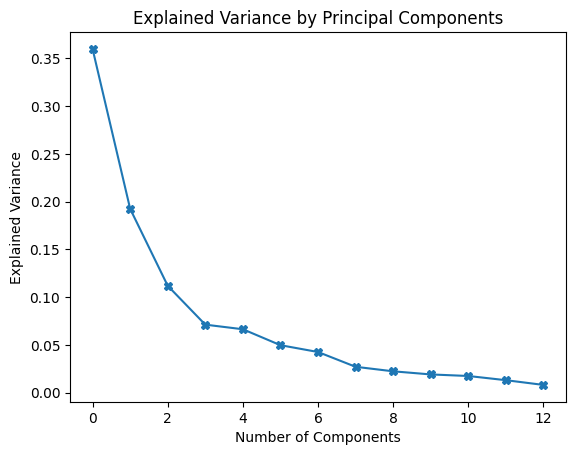

In [5]:
##Your Code start here

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(Datapoint)

# Create a PCA instance
pca = PCA()

# Fit the data and transform it to its principal components
principal_components = pca.fit_transform(data_standardized)
print('principal components: \n',principal_components)

# Plot the explained variance by each component
plt.plot(pca.explained_variance_ratio_, marker='X')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [7]:
##Your Code start here

# First, scale the data
mean = np.mean(Datapoint, axis=0)
std_dev = np.std(Datapoint, axis=0)
Datapoint_scaled = (Datapoint - mean) / std_dev

# Calculate the covariance matrix
cov_matrix = np.cov(Datapoint_scaled, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of principal components based on your previous analysis
num_components = 3  # Replace with your guessed number of components

# Select the top 'num_components' eigenvectors
top_eigenvectors = eigenvectors[:, :num_components]

# Project the data onto the new feature space defined by the top eigenvectors
pca_std_datapoint = np.dot(Datapoint_scaled, top_eigenvectors)
print(pca_std_datapoint)

##Your Code ends here

[[-2.23024297  0.30231277 -2.03292031]
 [-2.53192196 -1.06225676  0.97672434]
 [-3.75467731 -2.80530871 -0.18037013]
 [-1.0201307  -0.88838036  2.02386977]
 [-3.04919938 -2.1700067  -0.63874711]
 [-2.45822831 -1.20706466 -0.9882358 ]
 [-2.06160512 -1.64048497  0.14376754]
 [-2.51844454 -0.96083709 -1.78237967]
 [-2.76797089 -0.82452149 -0.98895639]
 [-3.48916135 -1.35519047 -0.42931898]
 [-1.76638133 -0.6467145  -1.20222501]
 [-2.12870494 -0.71042819 -0.88027853]
 [-3.46649467 -1.1821256  -1.2273527 ]
 [-4.31363172 -2.15473286 -1.27789771]
 [-2.30845048 -1.70092988  0.20695688]
 [-2.16745547 -2.36700104  0.82621814]
 [-1.90220844 -1.66778153  0.78746684]
 [-3.54012997 -2.57341412 -0.49894943]
 [-2.09274066 -1.08886084 -0.16408621]
 [-3.1319081  -0.82827339 -0.35847133]
 [-1.10804505 -0.25248228  0.9361854 ]
 [-2.55760384  0.06025432 -0.31737396]
 [-1.67255267  0.49502043  0.13642053]
 [-1.78792909  0.29470798  0.8822433 ]
 [-1.00222687 -0.95757325  3.81665994]
 [-1.79246479 -0.71100388

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

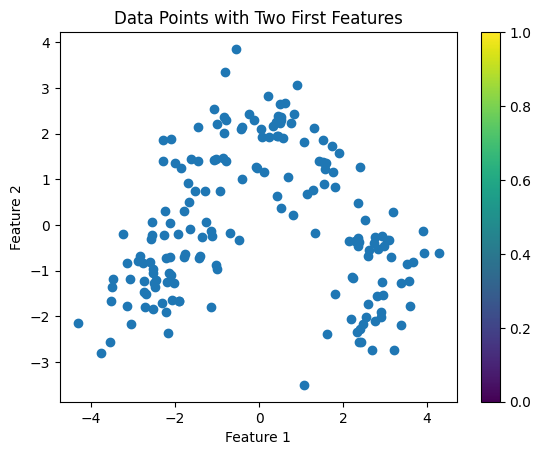

In [8]:
##Your Code start here
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1])
plt.title('Data Points with Two First Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()
##Your Code ends here

## Answer:
After plotting the data points, can visually inspect the distribution of the points and try to identify any potential clusters based on their proximity and density. The number of clusters can be estimated based on this visual inspection.
So I think, it can be 2 or 3 clusters.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




principal components: 
 [[-0.48843606 -0.01420808 -0.28023601 ...  0.07552428 -0.05244069
  -0.00559353]
 [-0.52381798 -0.19548409  0.19687646 ...  0.01013145 -0.10407329
  -0.02321537]
 [-0.82082954 -0.58983378  0.08216377 ... -0.08767097  0.10378255
  -0.05303022]
 ...
 [ 0.62767325 -0.54232884 -0.0305254  ...  0.13396808  0.10951092
   0.03867836]
 [ 0.57360011 -0.42124541 -0.09458977 ...  0.03474091  0.05558311
   0.0106418 ]
 [ 0.70237846 -0.50867074  0.29402061 ... -0.02716793  0.01889909
  -0.06649914]]


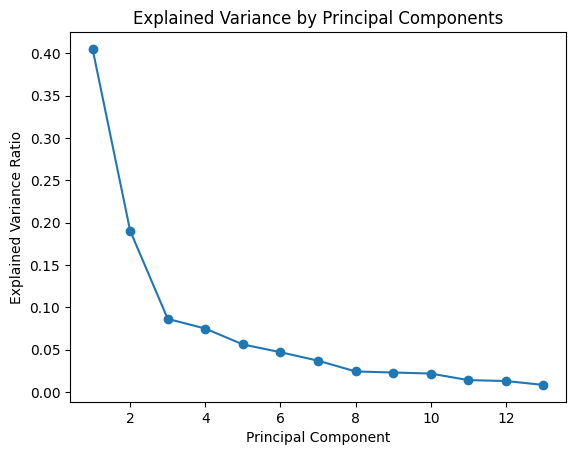

[[-1.08717169 -0.65395088 -0.7081056 ]
 [-1.12255362 -0.83522689 -1.18521807]
 [-1.41956517 -1.22957657 -1.07050538]
 [-0.80405424 -0.70183123 -1.28877881]
 [-1.20715552 -1.13452169 -0.91383253]
 [-1.14306537 -0.94528859 -0.8836425 ]
 [-1.07296179 -0.94228098 -0.98576358]
 [-1.10031108 -0.95312017 -0.75839956]
 [-1.22824407 -0.85293834 -0.8747776 ]
 [-1.32774944 -1.00468032 -0.93881162]
 [-0.9760385  -0.87023117 -0.70272141]
 [-1.04980722 -0.87789159 -0.82115467]
 [-1.22628347 -1.00216013 -0.90334171]
 [-1.43444902 -1.18723845 -0.87425916]
 [-1.07232333 -0.9833009  -0.91633191]
 [-1.02584022 -1.09585853 -1.04349672]
 [-0.96709543 -0.96065211 -1.04276385]
 [-1.31784875 -1.24272926 -0.89298916]
 [-1.05908659 -0.82016533 -1.03474354]
 [-1.26143526 -0.7731754  -0.97636368]
 [-0.86980058 -0.63291989 -1.2568084 ]
 [-1.20111982 -0.64452045 -0.98476927]
 [-1.02125545 -0.53080322 -0.95086849]
 [-1.05249414 -0.54590517 -1.10763954]
 [-0.8173637  -0.63275396 -1.46320842]
 [-1.01722872 -0.80062185

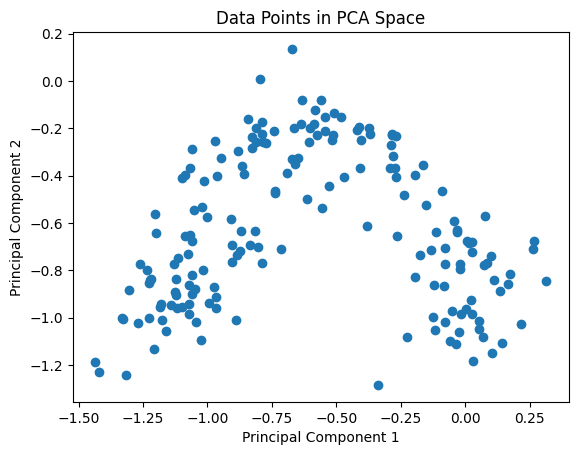

In [9]:
##Your Code start here

Datapoint = pd.read_csv('Datapoint.csv')
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
Datapoint_scaled = scaler.fit_transform(Datapoint)

# Apply PCA
pca = PCA()
pca.fit(Datapoint_scaled)
principal_components = pca.fit_transform(Datapoint_scaled)
print('principal components: \n',principal_components)
# Plot the explained variance by each component
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Implement PCA from scratch
def pca(X, num_components):
    # Compute the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)
    
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top 'num_components' eigenvectors
    principal_components = sorted_eigenvectors[:, :num_components]
    
    # Project the original data onto the selected principal components
    X_pca = np.dot(X, principal_components)
    
    return X_pca

# Set the number of components to reduce to
num_components = 3

# Apply PCA from scratch
pca_MinMax_datapoint = pca(Datapoint_scaled, num_components)
print(pca_MinMax_datapoint)


# Plot the data points using their two first features
plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points in PCA Space')

plt.show()

##Your Code ends here

### Answer:

as shown in the plots, starting variances are a little different, using MinMax we start from a higher variance but reach to almost a same variance zero as the number of principle components increases.

Also their 2D plots are different but from both plots, we can guess that there are 2 or 3 clusters.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

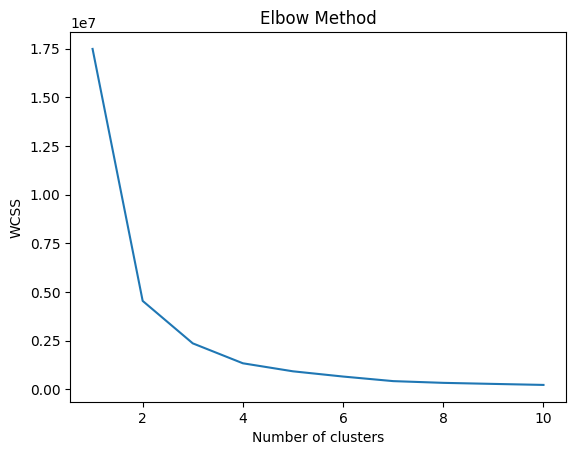

In [10]:
##Your Code start here

# Calculate the within-cluster sum of squares (WCSS) for different values of k
Datapoint = pd.read_csv('Datapoint.csv')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Datapoint)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Your Code ends here

### Answer:
So the optimal number of clusters is 3.

### What is inertia and silhouette metrics? Explain them briefly.




#### Answer:

1. Inertia:
   - Inertia, also known as within-cluster sum of squares (WCSS), is a measure of how internally coherent the clusters are. It calculates the sum of squared distances of samples to their closest cluster center. 
   - A lower inertia value indicates that the clusters are more compact and well-separated, which is generally desirable.
   - However, inertia alone may not be sufficient to determine the optimal number of clusters, as it tends to decrease as the number of clusters increases. This is where the "elbow method" can be used to find an optimal number of clusters based on the rate of decrease in inertia.
2. Silhouette Score:
   - The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - A higher silhouette score suggests that the clusters are well-separated and that the objects within the same cluster are similar to each other.
   - The silhouette score can be used to evaluate the quality of clustering when the ground truth about the data is not available.

In summary, inertia measures the compactness of clusters, while the silhouette score measures both the compactness and separation of clusters. These metrics are often used to assess the performance of clustering algorithms and to determine the optimal number of clusters for a given dataset.


In [11]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 33.02it/s]


In [12]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.29it/s]


Plot the **inertia** and **silhouette** values

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

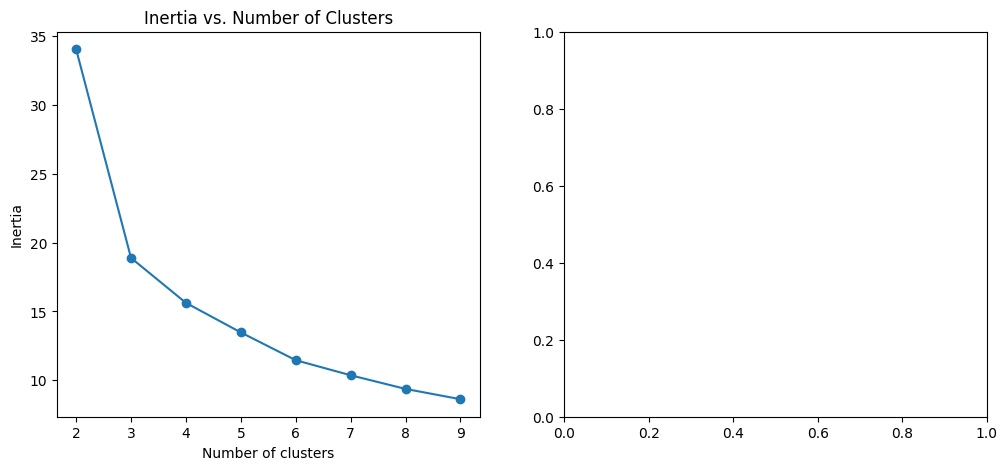

In [18]:
##Your Code start here

# Plot the inertia values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot the silhouette values
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette.values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()

##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [14]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


C:\Users\mc\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

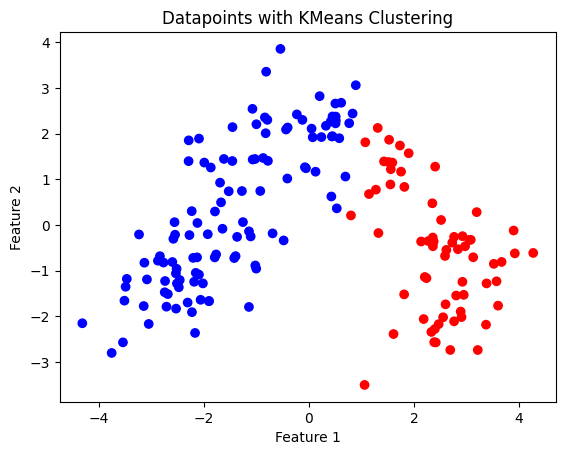

C:\Users\mc\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


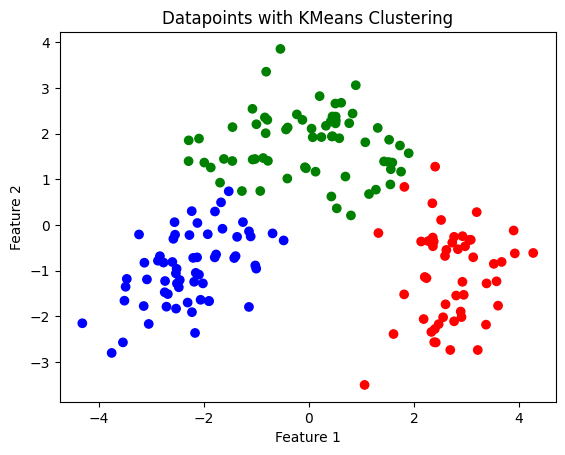

In [15]:
# Plotting the datapoints with different colors for each cluster
# Define the colors for each cluster
colors = ['red', 'blue','green']

# Plotting the datapoints with different colors for each cluster
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

Do all previous steps for MinMax scaled data points.





100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 33.34it/s]


NameError: name 'inertia_values' is not defined

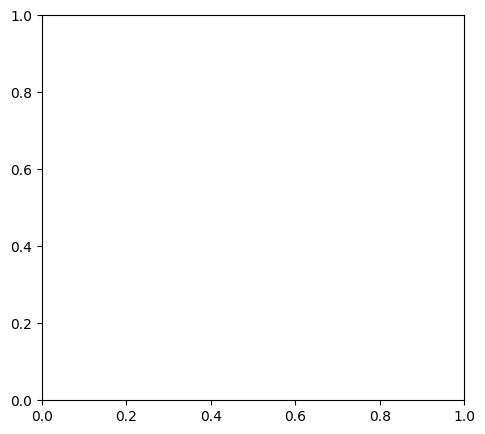

In [16]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_MinMax_datapoint)
    inertia.append(kmeans.inertia_)
    
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_MinMax_datapoint)
    silhouette[i] = sil(pca_MinMax_datapoint, kmeans.labels_, metric='euclidean')
    

# Plot the inertia values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot the silhouette values
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_MinMax_datapoint)
# Define the colors for each cluster
colors = ['red', 'blue','green']

# Plotting the datapoints with different colors for each cluster
plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_MinMax_datapoint)
plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

Compare the results of different scaling methods in a PCA problem

#### Answer:

The main difference between MinMax scaling and Standard scaling in a PCA problem lies in the way they normalize the data.

MinMax scaling (also known as normalization) transforms the data to a specific range, typically between 0 and 1. It works by subtracting the minimum value of the feature and then dividing by the range (maximum value minus minimum value). This scaling method is useful when you want to preserve the original distribution of the data and when you have outliers that you want to keep within the range.

On the other hand, Standard scaling (also known as z-score normalization) transforms the data to have zero mean and unit variance. It works by subtracting the mean of the feature and then dividing by the standard deviation. This scaling method is useful when you want to center the data around zero and have it spread out with a variance of 1. It is commonly used in PCA because it ensures that all features are on a similar scale, which helps in interpreting the importance of each principal component.

In summary, MinMax scaling rescales the data to a specific range, while Standard scaling standardizes the data to have zero mean and unit variance. The choice between these scaling methods depends on the specific requirements of PCA problem and the characteristics of data.
